<a href="https://colab.research.google.com/github/Haridharan05/Basic-Project-DS/blob/main/credit_card_fraud_detection_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import seaborn as sns
import numpy as np

In [57]:
data = pd.read_csv("/content/cc.csv")

In [58]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
108377,70870,1.163623,-0.298481,0.997601,0.776087,-0.927591,-0.028870,-0.635023,0.126963,1.043437,...,-0.114195,-0.219307,-0.048018,-0.092194,0.292444,0.346831,0.007686,0.025716,36.02,0
108378,70870,-2.015322,-0.769885,0.141497,1.882541,-2.473437,1.050718,2.881227,0.285992,-0.739290,...,0.471707,0.240793,1.732952,0.323477,0.191392,-0.264533,0.038436,0.199038,769.99,0
108379,70870,-0.529927,0.376538,1.284628,-2.010734,2.798080,3.737004,0.891548,-0.277812,0.496152,...,-0.384074,-0.658780,-0.371634,1.033411,-0.105515,0.642283,-1.381414,-1.061142,15.26,0
108380,70870,-0.926939,0.461009,1.164578,-0.544890,-0.538038,-0.081840,-0.198263,0.607792,-1.646494,...,-0.302337,-0.295319,0.008905,0.232580,-0.249280,0.309578,0.249101,0.094024,14.00,0
108381,70870,-0.925583,1.195762,1.082234,1.332040,-0.175901,0.292408,0.714470,0.465072,-1.610499,...,0.218730,0.409898,-0.057179,0.031971,0.403252,-0.063161,-0.053336,0.012985,104.94,0


In [ ]:
bins = (0,1)
health = ['depit','credit']
data['Class'] = pd.qcut(data['Class'],q=5 , duplicates='drop')


In [59]:
data.isnull()
data.isnull().sum().sum()
data.dropna(inplace = True)

In [60]:
fraud = data.loc[data['Class'] == 1]
normal = data.loc[data['Class'] == 0]

In [61]:
len(fraud)

238

In [62]:
len(normal)

108144

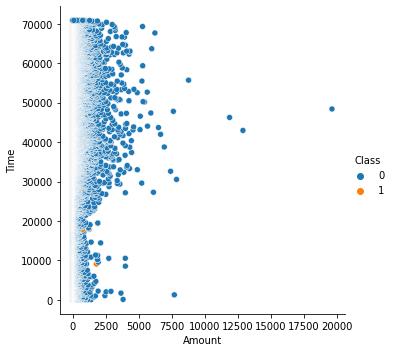

In [63]:
sns.relplot(x= 'Amount' , y = 'Time', hue = 'Class' , data=data)

In [64]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder


In [65]:
x = data.iloc[:,:-1]
y = data['Class']

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.35)

In [67]:
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [68]:
clf = linear_model.LogisticRegression(C=1e5)

In [69]:
clf . fit (x_train , y_train )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=100000.0)

In [70]:
y_pred = np.array (clf.predict (x_test))
y = np . array (y_test)

In [71]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [72]:
print (confusion_matrix(y_test,y_pred))

[[37836    17]
 [   34    47]]


In [73]:
print(accuracy_score(y,y_pred))

0.9986555596562451


In [74]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37853
           1       0.73      0.58      0.65        81

    accuracy                           1.00     37934
   macro avg       0.87      0.79      0.82     37934
weighted avg       1.00      1.00      1.00     37934



In [95]:
a = [[-0.54,-0.54,-0.54,-0.54,-0.54,-0.54,-0.54,-0.54,-0.54,-0.54,-0.54,-0.54,-0.54,-0.54,-0.54,-0.54,-0.54,-0.54,-0.54,-0.54,-0.54,-0.54,-0.54,-0.54,-0.54,-0.54,-0.54,-0.54,-0.54,-0.54,]]
a = s.transform(a)
b = clf.predict(a)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [96]:
b

array([0])

In [99]:
fraud.value_counts()

Time   V1          V2          V3         V4         V5         V6         V7          V8          V9         V10        V11        V12        V13        V14         V15        V16        V17        V18        V19        V20        V21         V22        V23        V24        V25        V26        V27        V28        Amount  Class
68207  -13.192671   12.785971  -9.906650   3.320337  -4.801176   5.760059  -18.750889  -37.353443  -0.391540  -5.052502   4.406806  -4.610756  -1.909488  -9.072711   -0.226074  -6.211557  -6.248145  -3.149247   0.051576  -3.493050   27.202839  -8.887017   5.303607  -0.639435   0.263203  -0.108877   1.269566   0.939407  1.00    1        6
406    -2.312227    1.951992   -1.609851   3.997906  -0.522188  -1.426545  -2.537387    1.391657   -2.770089  -2.772272   3.202033  -2.899907  -0.595222  -4.289254    0.389724  -1.140747  -2.830056  -0.016822   0.416956   0.126911   0.517232   -0.035049  -0.465211   0.320198   0.044519   0.177840   0.261145  -0.143276  0.00